# twipper - Twitter Wrapper written in Python

**por Álvaro Bartolomé del Canto @ alvarob96 en GitHub**

---
## Introducción

**twipper** es un paquete de Python para interactuar con la API de Twitter con Python. **twipper** es un acrónimo de Twitter Wrapper, dado que el paquete es un envoltorio de los *endpoints* de la API de Twitter. De este modo, **twipper** cubre la extracción de *tweets* tanto en tiempo real (*streaming*) como de un histórico (*batch*) de ambos planes ofertados por Twitter: Free y Premium.

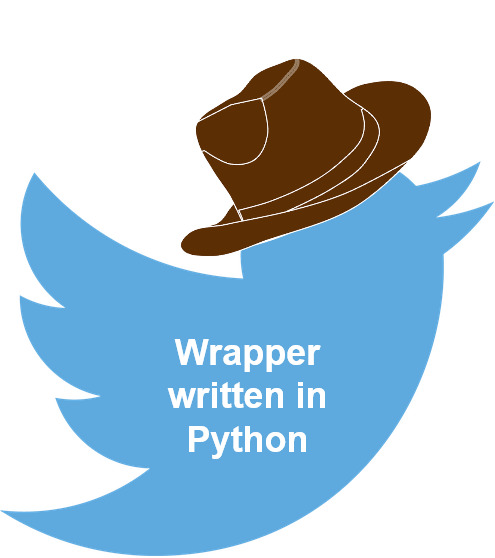

In [2]:
from IPython.display import Image
Image(filename='resources/twipper.jpg')

Siendo así el hecho de integrar funciones de la API Free y de la API Premium en un mismo paquete uno de los factores diferenciales por los que se ha creado **twipper** respecto de [tweepy](https://github.com/tweepy/tweepy) o [searchtweets](https://github.com/twitterdev/search-tweets-python).

---
## Instalación

Para instalar **twipper** se requiere una versión de Python 3.x y tener **pip** instalado, para así poder instalar paquetes de Python de [PyPI](https://pypi.org/). De este modo, **twipper** se instalará desde la terminal de la forma:

`$ python -m pip install twipper==0.1.3`

O, en caso de disponer de una versión de __twipper__ instalada, para actualizar dicha versión a la última disponible, ejecutar la siguiente orden en terminal:

`$ python -m pip install twipper --upgrade`

---
## Uso

**twipper** se creó para suplir las necesidades encontradas a la hora de recuperar *tweets* a través de la API de Twitter, ya que ningún paquete existente cubría todas las necesidades o endpoints proporcionados por la API, quedando así ausentes bien la versión Free o bien la versión Premium. De este modo, **twipper** se creó con el fin de simplificar su uso y hacer de este paquete uno extensible, dado que en caso de que haya cambios en la API de Twitter no será necesario esperar a que ninguna de las dependencias sea actualizada.

Por tanto, el uso principal de **twipper** es extraer tweets a través de la API de Twitter con Python de una forma fácil, haciendo así de **twipper** un paquete usable y eficaz.

In [1]:
import twipper

In [2]:
(twipper.__author__, twipper.__version__)

('Alvaro Bartolome @ alvarob96 on GitHub', '0.1.3')

### Batch Free

Las funciones `twipper.batch.search_tweets` y `twipper.batch.search_user_tweets` recuperan tweets de los últimos 7 días en adelante que coincidan con la *query* introducida. Se puede consultar la documentación en: https://twipper.readthedocs.io/batch.html

In [94]:
import twipper

In [95]:
cred = twipper.Twipper(consumer_key='Si1dJus1cp3YefEzGsnbLh37u',
                       consumer_secret='vDoaKZ49J2IfCO9BeM8hWONPd0AF00wxfQ16ilhKlEKz66pqZv',
                       access_token='894988499526590464-axe4Lj1pATPMLpIrxpAdw38HnOodYaf',
                       access_token_secret='4aNUPWEdIoSz0E2mZe9ywYxyDL8orWWufLgEvaOrhHfWt')

Se hará uso de `twipper.utils` para la **conversión de queries de twipper a queries de Twitter**.

In [96]:
query = 'real AND madrid OR barça'

In [97]:
from twipper.utils import standard_query

In [98]:
query = standard_query(query)

In [99]:
query

'real madrid OR barça'

In [100]:
from twipper.batch import search_tweets

In [101]:
tweets = search_tweets(access=cred,
                       query=query,
                       page_count=1,
                       filter_retweets=True,
                       language='es',
                       result_type='popular',
                       count=10)

De los datos recuperados del *batch processing* se mostrará el contenido en texto plano de los mismos.

In [102]:
%%time

for tweet in tweets:
    if 'retweeted_status' in tweet:
        if 'extended_tweet' in tweet['retweeted_status']:
            print(tweet['retweeted_status']['extended_tweet']['full_text'])
        else:
            print(tweet['retweeted_status']['text'])
    else:
        if 'extended_tweet' in tweet:
            print(tweet['extended_tweet']['full_text'])
        else:
            print(tweet['text'])

PSG vs Real Madrid devaluado.
Entre suspendidos y lesionados no juegan:
Sergio Ramos
Modric
Marcelo
Isco
Asensio
Na… https://t.co/rs1kzABpK3
🚨🚨¡EXCLUSINDA! #Inda: "El Real MADRID ha pactado 35M€ (+5 en variables) con MBAPPÉ y el traspaso serían 225M€ (+50… https://t.co/XpQPqNhlHy
"Aquí los fans son realmente fans. En Inglaterra gusta el fútbol y todos, los jóvenes, los adultos, están realmente… https://t.co/YPhYt2scMF
"Cuando gana, porque aburre. Cuando golea, porque se lo toma demasiado en serio. Cómo no esperarlo pidiendo poco me… https://t.co/FzCkMYISqY
📺⚽ RESUMEN &amp; GOLES
🆚 @CD_Tacon 3-0 @sportinghuelva 
🏆 Primera Iberdrola
🏟 Ciudad Real Madrid
#GoTACON https://t.co/t4uv1ve1LE
➔ Radamel Falcao marcó con Galatasaray.
➔ Duván Zapata marcó con Atalanta.
➔ Luis Muriel marcó con Atalanta.
➔ Jame… https://t.co/8Kv5Npo32B
#LasMujeresJueganA3N El Tacon quita el escudo del Real Madrid de sus dorsales tras el 9-1 contra el Barça https://t.co/5NUGprvJ00
EL MEJOR EQUIPO DE ICONOS DEL REAL M

---
### Batch Premium

Las funciones `twipper.premium.search_tweets` y `twipper.premium.search_user_tweets` recuperan tweets en base a un histórico de tweets entre las fechas especificadas. Adicionalmente, el resto de parámetros opcionales se podrán modificar para ajustar el resultado de la búsqueda a las necesidades. Se puede consultar la documentación en: https://twipper.readthedocs.io/premium.html

In [144]:
import twipper

In [145]:
cred = twipper.Twipper(consumer_key='Si1dJus1cp3YefEzGsnbLh37u',
                       consumer_secret='vDoaKZ49J2IfCO9BeM8hWONPd0AF00wxfQ16ilhKlEKz66pqZv',
                       access_token='894988499526590464-axe4Lj1pATPMLpIrxpAdw38HnOodYaf',
                       access_token_secret='4aNUPWEdIoSz0E2mZe9ywYxyDL8orWWufLgEvaOrhHfWt')

Dado que la API Premium requiere como datos adicionales el **PLAN** y el **LABEL** al que pertenece, se procederá a la adición de los mismos al objeto de credenciales `twipper.Twipper`. Tanto el PLAN como el LABEL servirán para construir el endpoint de la API Premium.

In [146]:
cred.plan = 'fullarchive'
cred.label = 'research'

Se hará uso de `twipper.utils` para la **conversión de queries de twipper a queries de Twitter**.

In [147]:
query = 'real AND madrid OR barça'

In [148]:
from twipper.utils import standard_query

In [149]:
query = standard_query(query)

In [150]:
query

'real madrid OR barça'

In [151]:
from twipper.premium import search_tweets

In [152]:
tweets = search_tweets(access=cred,
                       query=query,
                       page_count=1,
                       from_date='201903010000',
                       to_date='201905010000',
                       language='es',
                       filter_retweets=False)

De los datos recuperados del *batch processing* se mostrará el contenido en texto plano de los mismos.

In [153]:
%%time

for tweet in tweets:
    if 'retweeted_status' in tweet:
        if 'extended_tweet' in tweet['retweeted_status']:
            print(tweet['retweeted_status']['extended_tweet']['full_text'])
        else:
            print(tweet['retweeted_status']['text'])
    else:
        if 'extended_tweet' in tweet:
            print(tweet['extended_tweet']['full_text'])
        else:
            print(tweet['text'])

Real Madrid ✅
Juventus ✅
Tottenham ✅

Ajax have now won all 3 away legs in the UCL knockout stage. 👀 https://t.co/CjNprFu1Dz
Campeones de liga casi por rutina una temporada más, finalistas de Copa, semifinalistas de Champions y aún así cada vez que juega el Ajax, parece que el Barça tenga que pedir perdón por no ganar como el manual del buen culé dice que se debe ganar. En fin...
Vamos barça !!! ❤️💙
Vamos flamengo !!! ❤️🖤
⚽️🙌🏼
@elchiringuitotv ganaremos esta competencia y la que le sigue también  como Messi nadie vamos barca
🏆 Si te dieran a elegir en el año 2000, escogerías...
🔁 RT: Real Madrid
❤️ FAV: Barcelona https://t.co/TPONZ37Rqc
@magicalcantara @Khal0184 They did, they are only looking for an excuse because they don't realize that the Ajax they played, beat Bayern, Real Madrid and Juventus and who is Tottenham ? :)
😂 Estáis equivocados amigos, le dije al terapeuta que solo me pasaría al Barça si Messi reconoce que su corazón es madridista desde shiquetito. 

¡La vida sigue sien

---
### Streaming

Las funciones `twipper.streaming.stream_tweets` y `twipper.streaming.stream_country_tweets` recuperan tweets en tiempo real de la *query* intoducida, pudiendo configurar dicha búsqueda tal y como se documenta en: https://twipper.readthedocs.io/streaming.html

In [85]:
import twipper

In [86]:
cred = twipper.Twipper(consumer_key='Si1dJus1cp3YefEzGsnbLh37u',
                       consumer_secret='vDoaKZ49J2IfCO9BeM8hWONPd0AF00wxfQ16ilhKlEKz66pqZv',
                       access_token='894988499526590464-axe4Lj1pATPMLpIrxpAdw38HnOodYaf',
                       access_token_secret='4aNUPWEdIoSz0E2mZe9ywYxyDL8orWWufLgEvaOrhHfWt')

Se hará uso de `twipper.utils` para la **conversión de queries de twipper a queries de Twitter**.

In [87]:
query = 'real AND madrid OR barça'

In [88]:
from twipper.utils import streaming_query

In [89]:
query = streaming_query(query)

In [90]:
query

'real madrid,barça'

In [91]:
from twipper.streaming import stream_tweets

In [92]:
tweets = stream_tweets(access=cred,
                       query=query,
                       language='es',
                       filter_retweets=True,
                       tweet_limit=5,
                       date_limit=None,
                       retry='no_limit')

De los datos recuperados del *streaming* se mostrará el contenido en texto plano de los mismos.

In [93]:
%%time

for tweet in tweets:
    if 'retweeted_status' in tweet:
        if 'extended_tweet' in tweet['retweeted_status']:
            print(tweet['retweeted_status']['extended_tweet']['full_text'])
        else:
            print(tweet['retweeted_status']['text'])
    else:
        if 'extended_tweet' in tweet:
            print(tweet['extended_tweet']['full_text'])
        else:
            print(tweet['text'])

@QueThiJugues Borussia 3( Pablo Alcácer 2+ Sancho - Barça 0 #QueThiJugues
@Blayasensat Banangida el hermano pequeño 
Víctor Vázquez decían k era mejor k Messi cuando estaban juntos en el famosos cadete del Barça 
Y el  caso más bestia para mo es Bojan, su cabeza no pudo con la presión
Si fueras de la cantera del Barça te inscribirían en el prebenjamín...
Regresa la @ChampionsLeague. 🥰 ⚽
@QueThiJugues Borussia 3 (Pablo Alcácer 2 + Sancho) - Barça 0 #QueThiJugues
Wall time: 1min 2s


----
### Queries

Las funcionalidades de **twipper** están principalmente orientadas a la extracción de tweets de la API de Twitter, pero también implementa un sistema de **Queries** propio, que sirve como estándar intermedio y que convierte dichas *queries* a *queries* propias de Twitter, ya que no tiene un formato unificado entre las de *Batch* y las de *Streaming*.

In [12]:
from twipper.utils import standard_query, streaming_query

In [13]:
twipper_query = 'gato OR perro AND mascota'

In [14]:
standard_query(twipper_query)

'gato OR perro mascota'

In [15]:
streaming_query(twipper_query)

'gato,perro mascota'

Adicionalmente, mencionar que el hecho de integrar las **Queries** propias de **twipper**, hace que el paquete sea más usable y extensible, dado que puede ser integrado con otros paquetes y ser usado solo para formatear *queries*, independientemente de que estén orientadas a su uso integrado con **twipper**.

---
## Información Adicional

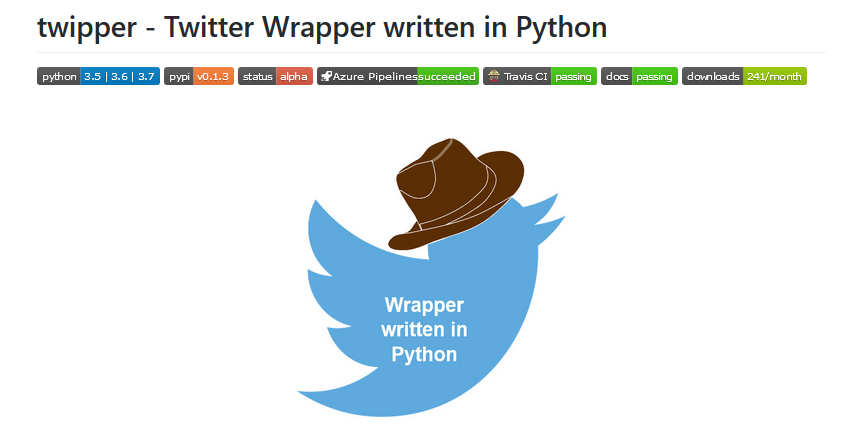

In [4]:
from IPython.display import Image
Image(filename='resources/twipper.png')

---
## Documentación

La documentación de [twipper](https://github.com/alvarob96/twipper/) se ha generado con [sphinx](http://www.sphinx-doc.org/en/master/) que es una herramienta para generar documentación en Python basado en *reStructuredText*. Además, la documentación se ha subido al sistema de alojamiento de documentación [Read the Docs](https://readthedocs.org/).

De este modo, se podrá encontrar la documentación en: https://twipper.readthedocs.io/

---
## Licencia

---
## Autor

**Álvaro Bartolomé del Canto, 2019**